# TELECOM CHURN CASE STUDY

# Analysis Approach:
Telecommunications industry experiences an average of 15 - 25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition.
Here we are given with 4 months of data related to customer usage. In this case study, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
Churn is predicted using two approaches. Usage based churn and Revenue based churn. Usage based churn:
Customers who have zero usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
This case study only considers usage based churn.
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

This is a classification problem, where we need to predict whether the customers is about to churn or not. We have carried out Baseline Logistic Regression, then Logistic Regression with PCA, PCA + Random Forest, PCA + XGBoost.

# Analysis Steps

# Data Cleaning and EDA
We have started with importing Necessary packages and libraries.
We have loaded the dataset into a dataframe.
We have checked the number of columns, their data types, Null count and unique value_value_count to get some understanding about data and to check if the columns are under correct data-type.
Checking for duplicate records (rows) in the data. There were no duplicates.
Since 'mobile_number' is the unique identifier available, we have made it our index to retain the identity.
Have found some columns that donot follow the naming standard, we have renamed those columns to make sure all the variables follow the same naming convention.
Follwing with column renaming, we have dealt with converting the columns into their respective data types. Here, we have evaluated all the columns which are having less than or equal to 29 unique values as catrgorical columns and rest as contineous columns.
The date columns were having 'object' as their data type, we have converted to the proper datetime format.
Since, our analysis is focused on the HVC(High value customers), we have filtered for high value customers to carryout the further analysis. The metric of this filtering of HVC is such that all the customers whose 'Average_rech_amt' of months 6 and 7 greater than or equal to 70th percentile of the 'Average_rech_amt' are considered as High Value Customers.
Checked for missing values.
Dropped all the columns with missing values greater than 50%.
We have been given 4 months data. Since each months revenue and usage data is not related to other, we did month-wise drill down on missing values.
Some columns had similar range of missing values. So, we have looked at their related columns and checked if these might be imputed with zero.
We have found that 'last_date_of_the_month' had some misisng values, so this is very meaningful and we have imputed the last date based on the month.
We have found some columns with only one unique value, so it is of no use for the analysis, hence we have dropped those columns.
Once after checking all the data preparation tasks, tagged the Churn variable(which is our target variable).
After imputing, we have dropped churn phase columns (Columns belonging to month - 9).
After all the above processing, we have retained 30,011 rows and 126 columns.
Exploratory Data Analysis

# Analysis Results

The telecom company has many users with negative average revenues in both phases. These users are likely to churn.
Most customers prefer the plans of '0' category.
The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'.
Revenue generated by the Customers who are about to churn is very unstable.
The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.
The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.
The Customers with decrease in rate of total_ic_mou in 7th month are more likely to churn, compared to the rest.
Customers with stable usage of 2g volume throughout 6 and 7 months are less likely to churn.
Customers with fall in usage of 2g volume in 7th month are more likely to Churn.
Customers with stable usage of 3g volume throughout 6 and 7 months are less likely to churn.
Customers with fall in consumption of 3g volume in 7th month are more likely to Churn.
The customers with lower total_og_mou in 6th and 8th months are more likely to Churn compared to the ones with higher total_og_mou.
The customers with lesser total_og_mou_8 and aon are more likely to churn compared to the one with higher total_og_mou_8 and aon.
The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
The customers with total_ic_mou_8 > 2000 are very less likely to churn.

# Important Steps carried out

Correlation analysis has been performed.
We have created the derived variables and then removed the variables that were used to derive new ones.
Outlier treatment has been performed. We have looked at the quantiles to understand the spread of Data.
We have capped the upper outliers to 99th percentile.
We have checked categorical variables and contribution of classes in those variables. The classes with less ccontribution are grouped into 'Others'.
Dummy Variables were created.


# Pre-processing Steps


Train-Test Split has been performed.
The data has high class-imbalance with the ratio of 0.095 (class 1 : class 0).
SMOTE technique has been used to overcome class-imbalance.
Predictor columns have been standardized to mean - 0 and standard_deviation- 1.

# Modelling

Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
Most important predictors of Churn , in order of importance and their coefficients are as follows :

loc_ic_t2f_mou_8 -1.2736
total_rech_num_8 -1.2033
total_rech_num_6 0.6053
monthly_3g_8_0 0.3994
monthly_2g_8_0 0.3666
std_ic_t2f_mou_8 -0.3363
std_og_t2f_mou_8 -0.2474
const -0.2336
monthly_3g_7_0 -0.2099
std_ic_t2f_mou_7 0.1532
sachet_2g_6_0 -0.1108
sachet_2g_7_0 -0.0987
sachet_2g_8_0 0.0488
sachet_3g_6_0 -0.0399
PCA: PCA : 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.
        
        
Model 2 : PCA + Logistic Regression

    Train Performance :  

    Accuracy : 0.627
    Sensitivity / True Positive Rate / Recall : 0.918
    Specificity / True Negative Rate :  0.599
    Precision / Positive Predictive Value : 0.179
    F1-score : 0.3

    Test Performance :

    Accuracy : 0.086
    Sensitivity / True Positive Rate / Recall : 1.0
    Specificity / True Negative Rate :  0.0
    Precision / Positive Predictive Value : 0.086
    F1-score : 0.158
        
        
Model 3 : PCA + Random Forest Classifier

    Train Performance :  

    Accuracy : 0.882
    Sensitivity / True Positive Rate / Recall : 0.816
    Specificity / True Negative Rate :  0.888
    Precision / Positive Predictive Value : 0.408
    F1-score : 0.544

    Test Performance :

    Accuracy : 0.86
    Sensitivity / True Positive Rate / Recall : 0.80
    Specificity / True Negative Rate :  0.78
    Precision / Positive Predictive Value :0.37
    F1-score :0.51

        
        
Model 4 : PCA + XGBoost

    Train Performance :  

    Accuracy : 0.873
    Sensitivity / True Positive Rate / Recall : 0.887
    Specificity / True Negative Rate :  0.872
    Precision / Positive Predictive Value : 0.396
    F1-score : 0.548

    Test Performance :

    Accuracy : 0.086
    Sensitivity / True Positive Rate / Recall : 1.0
    Specificity / True Negative Rate :  0.0
    Precision / Positive Predictive Value : 0.086
    F1-score : 0.158        


# Recommendations :
Following are the strongest indicators of churn

Customers who churn show lower average monthly local incoming calls from fixed line in the action period by 1.27 standard deviations , compared to users who don't churn , when all other factors are held constant. This is the strongest indicator of churn. Customers who churn show lower number of recharges done in action period by 1.20 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn. Further customers who churn have done 0.6 standard deviations higher recharge than non-churn customers. This factor when coupled with above factors is a good indicator of churn. Customers who churn are more likely to be users of 'monthly 2g package-0 / monthly 3g package-0' in action period (approximately 0.3 std deviations higher than other packages), when all other factors are held constant.

Based on the above indicators the recommendations to the telecom company are :

Concentrate on users with 1.27 std devations lower than average incoming calls from fixed line. They are most likely to churn. Concentrate on users who recharge less number of times ( less than 1.2 std deviations compared to avg) in the 8th month. They are second most likely to churn. Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.87, test sensitivity of 100%.

# Analysis

# Data Understanding

In [76]:
# Importing Necessary Libraries.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [12]:
# Reading Dataset into a DataFrame.
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [13]:
# Checking information about data.
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


# Data Cleaning

In [14]:
# Checking if there are any duplicate records.
data['mobile_number'].value_counts().sum()

99999

# Since number of rows is same as distinct mobile numbers, there is no duplicate data

In [15]:
# mobile_number is a unique identifier 
# Setting mobile_number as the index 
data = data.set_index('mobile_number')

In [16]:
# Renaming columns 
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [17]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [20]:
# Converting all the above columns having <=29 unique values into categorical data type.
data[change_to_cat]=data[change_to_cat].astype('category')

In [21]:
# Converting *sachet* variables to categorical data type 
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [22]:
#Changing datatype of date variables to datetime.
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [23]:
# Checking the date format
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


Lets convert the above columns to datetime data type.

In [24]:
for col in col_with_date:
    data[col]=pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


# Filtering High Value Customers

Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [25]:
#Deriving Average recharge amount of June and July.
data['Average_rech_amt_6n7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [26]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
data=data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

# Missing Values

In [27]:
#Checking for missing values.
missing_values = metadata_matrix(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
date_of_last_rech_data_6,datetime64[ns],62.02
total_rech_data_6,float64,62.02
arpu_3g_6,float64,62.02
fb_user_6,category,62.02
count_rech_3g_6,category,62.02


In [28]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(data)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [29]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
data.drop(columns=high_missing_value_columns, inplace=True)

In [30]:
# Looking at remaining columns with missing values 
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
roam_og_mou_9,float64,28307,1704,5.68,4004
std_ic_t2f_mou_9,float64,28307,1704,5.68,1971
std_og_t2c_mou_9,category,28307,1704,5.68,1
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
std_og_t2f_mou_9,float64,28307,1704,5.68,1595


data contains information of 04 months - 6,7,8,9.
For the purpose of missing value treatment, each month's revenue and usage data is not related to the other months.
hence, missing value treatment could be performed month wise.

# Month 6 

In [31]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


Note that all the columns with *_mou have exactly 3.94% rows with missing values.
This is an indicator of a meaningful missing values.
Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.94% customers not using calling plans.
This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [32]:
#  columns with meaningful missing in 6th month 
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [33]:
# Looking at all sixth month columns where rows of *_mou are null
condition = data[sixth_month_meaningful_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]


# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0

In [34]:
# Imputation
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


Looks like there '1.61%' customers with missing date of last recharge. Let's look at 'recharge' related columns for such customers

In [35]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = data['date_of_last_rech_6'].isnull()
data[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [36]:
data[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_6' has just one unique value. From the first few rows of the output, we see that this is 0.
Hence, 'date_of_last_rech_6' is missing since there were no recharges made in this month.
These are meaning missing values

In [37]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [38]:
# Month : 7 
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [39]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


Note that all the columns with *_mou have exactly 3.86% rows with missing values.
This is an indicator of a meaningful missing values.
Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.86% customers not using calling plans.
This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [40]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [41]:
# Looking at all 7th month columns where rows of *_mou are null
condition = data[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0

In [42]:
# Imputation
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


Looks like there '1.77%' customers with missing date of last recharge. Let's look at 'recharge' related columns for such customers

In [43]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = data['date_of_last_rech_7'].isnull()
data[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [44]:
data[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_7' has just one unique value. From the first few rows of the output, we see that this is 0.
Hence, 'date_of_last_rech_7' is missing since there were no recharges made in this month.
These are meaning missing values

# Month : 8 

In [45]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [46]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [47]:
# Looking at all 8th month columns where rows of *_mou are null
condition = data[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [48]:
# Imputation
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [49]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = data['date_of_last_rech_8'].isnull()
data[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [50]:
data[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

# Month : 9

In [51]:
ninth_month_columns = data.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [52]:
#  columns with meaningful missing in 9th month 
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [53]:
# Looking at all 9th month columns where rows of *_mou are null
condition = data[ninth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in ninth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [54]:
# Imputation
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [55]:
# Looking at 'recharge' related 9th month columns for customers with missing 'date_of_last_rech_9' 
condition = data['date_of_last_rech_9'].isnull()
data[condition].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [56]:
data[condition].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [57]:
# Imputing "last_date_of_month_*"

In [58]:
print('Missing Value Percentage in last_date_of_month columns : \n', 100*data.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / data.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


Last date of month is the last calender date of a particular month, it is independent of the churn data.
Lets impute these missing values using mode.

In [59]:
# Imputing last_date_of_month_* values
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [60]:
data['last_date_of_month_7'].unique()

array(['7/31/2014'], dtype=object)

In [61]:
metadata = metadata_matrix(data)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
loc_ic_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
isd_ic_mou_6,float64,30011,0,0.00,3429
total_ic_mou_6,float64,30011,0,0.00,20602
total_ic_mou_7,float64,30011,0,0.00,20711


In [62]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [63]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

The columns 'date_of_last_rech' for june,july and August does not have any value becuase there are no recharges done by the user during those months.

# Dropping columns with one unique value.

In [64]:
metadata=metadata_matrix(data)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values
#data.loc[metadata_matrix(data)['Unique_Values_Count']==1].index

In [65]:
#Dropping singular value columns.
data.drop(columns=singular_value_cols,inplace=True)

In [66]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
spl_ic_mou_7,float64,30011,0,0.0,93
spl_ic_mou_8,float64,30011,0,0.0,85
spl_ic_mou_9,float64,30011,0,0.0,287
isd_ic_mou_6,float64,30011,0,0.0,3429
isd_ic_mou_7,float64,30011,0,0.0,3639


# Tagging Churn (TARGET variable)

In [67]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn']=1
data['Churn'] = data['Churn'].astype('category')

In [68]:
# Churn proportions
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


# Dropping Churn Phase Columns

In [69]:
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
5,onnet_mou_8
6,offnet_mou_6
7,offnet_mou_7
8,offnet_mou_8
9,roam_ic_mou_6


In [70]:
print('retained no of rows', data.shape[0])
print('retain no of columns', data.shape[1])

retained no of rows 30011
retain no of columns 126


# Exploratory Data Analysis

# Summary Statistics

In [71]:
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,415.327988,353.558826,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.749054,70.311351,65.936968,159.613810,160.813032,153.628517,15.595629,16.510023,14.706512,243.968340,247.644401,234.281577,16.229350,16.893723,15.051559,32.015163,33.47715

The telecom company has many users with negative average revenues in both phases. These users are likely to churn

In [72]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


Most customers prefer the plans of '0' category

# Univariate Analysis

In [73]:
churned_customers = data[data['Churn'] == 1]
non_churned_customers = data[data['Churn'] == 0]

# Age on Network

In [77]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

TypeError: Categorical cannot perform the operation std

<Figure size 864x576 with 0 Axes>

The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

In [78]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

ModuleNotFoundError: No module named 'tabulate'

In [79]:
# function for categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

FileNotFoundError: [WinError 2] The system cannot find the file specified

# arpu_6, arpu_7 , arpu_8

In [80]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

NameError: name 'num_univariate_analysis' is not defined

We can understand from the above plots that revenue generated by the Customers who are about to churn is very unstable.
The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

# total_og_mou_6, total_og_mou_7, total_og_mou_8

In [81]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

NameError: name 'num_univariate_analysis' is not defined

The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.

# 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8

In [82]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

NameError: name 'num_univariate_analysis' is not defined

Customers with stable usage of 2g volumes throughout 6 and 7 months are less likely to churn.
Customers with fall in consumption of 2g volumes in 7th month are more likely to Churn.

# vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, monthly_3g_6

In [83]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

NameError: name 'num_univariate_analysis' is not defined

Customers with stable usage of 3g volumes throughout 6 and 7 months are less likely to churn.
Customers with fall in consumption of 3g volumes in 7th month are more likely to Churn.

# monthly_2g_6, monthly_2g_7, monthly_2g_8

In [84]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

NameError: name 'cat_univariate_analysis' is not defined

# monthly_3g_6, monthly_3g_7, monthly_3g_8

In [85]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

NameError: name 'cat_univariate_analysis' is not defined

# sachet_3g_6, sachet_3g_7, sachet_3g_8

In [86]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(data[columns].dtypes)
cat_univariate_analysis(columns)

sachet_3g_6    category
sachet_3g_7    category
sachet_3g_8    category
dtype: object


NameError: name 'cat_univariate_analysis' is not defined

# aug_vbc_3g, jul_vbc_3g, jun_vbc_3g

In [87]:
columns = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns, 'log')

NameError: name 'num_univariate_analysis' is not defined

# Bivariate Analysis

In [88]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,7

# 'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

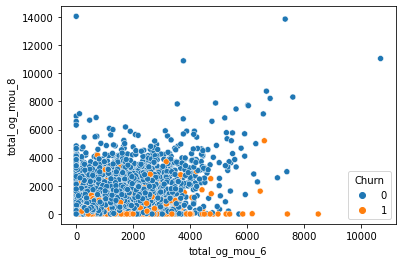

In [91]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])

# 'total_og_mou_7' vs 'total_og_mou_8' with respect to Churn

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

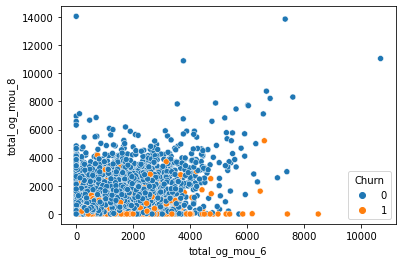

In [90]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])

The customers with lower total_og_mou in 6th and 8th months are more likely to Churn compared to the ones with higher total_og_mou.

# 'aon' vs 'total_og_mou_8' with respect to Churn

<AxesSubplot:xlabel='aon', ylabel='total_og_mou_8'>

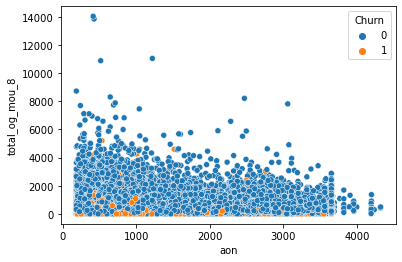

In [92]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['Churn'])


The customers with lesser total_og_mou_8 and aon are more likely to churn compared to the one with higher total_og_mou_8 and aon.

<AxesSubplot:xlabel='aon', ylabel='total_ic_mou_8'>

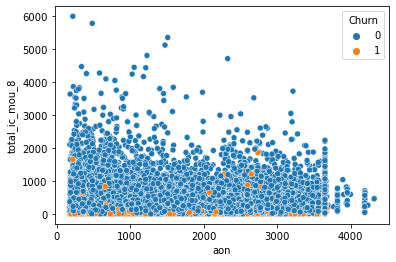

In [93]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['Churn'])

The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
The customers with total_ic_mou_8 > 2000 are very less likely to churn.

# 'max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'

<AxesSubplot:xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

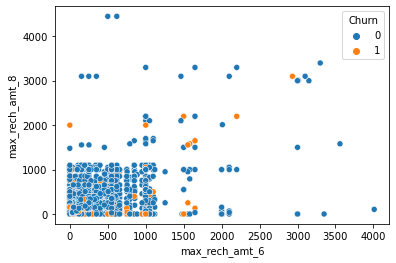

In [94]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['Churn'])

# Correlation Analysis

In [95]:
# function to correlate variables
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [96]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 
pd.set_option('precision', 2)
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_8,isd_og_mou_7,0.96
isd_og_mou_8,isd_og_mou_6,0.95
isd_og_mou_7,isd_og_mou_6,0.95
total_rech_amt_8,arpu_8,0.95
arpu_6,total_rech_amt_6,0.94
arpu_7,total_rech_amt_7,0.94
Average_rech_amt_6n7,total_rech_amt_7,0.91
Average_rech_amt_6n7,arpu_7,0.91
Average_rech_amt_6n7,total_rech_amt_6,0.90
total_ic_mou_6,loc_ic_mou_6,0.90


In [97]:
# Correlations for Churn : 1  - churned customers
# Absolute values are reported 
pd.set_option('precision', 2)
cor_1 = correlation(churned_customers)

# filtering for correlations >= 40%
condition = cor_1['CORR'] > 0.4
cor_1 = cor_1[condition]
cor_1.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
og_others_8,og_others_7,1.00
total_rech_amt_8,arpu_8,0.96
std_og_mou_8,total_og_mou_8,0.95
arpu_7,total_rech_amt_7,0.95
arpu_6,total_rech_amt_6,0.95
std_og_t2t_mou_7,onnet_mou_7,0.95
std_og_mou_7,total_og_mou_7,0.94
loc_og_t2f_mou_6,og_others_7,0.93
loc_og_t2f_mou_6,og_others_8,0.93
loc_og_t2f_mou_7,loc_og_t2f_mou_6,0.93


# Data Preparation

# Derived Variables

In [98]:
# Derived variables to measure change in usage 

# Usage 
data['delta_vol_2g'] = data['vol_2g_mb_8'] - data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_8'] - data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)

# Revenue 
data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)

In [99]:
# Removing variables used for derivation : 
data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

# Outlier Treatment

In [100]:
# Looking at quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).style.bar()

In [101]:
# Looking at percentage change in quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.91,6.79,6.55,8.27,5.59,5.17,5.33,21.27,26.80,25.22,21.64,21.39,25.13,8.67,8.20,8.59,5.96,5.56,6.04,10.34,10.83,11.08,15.84,13.88,14.88,6.25,5.37,5.73,8.84,8.90,9.66,8.94,7.72,9.82,32.27,28.44,31.79,4.79,5.71,6.43,nan,nan,nan,10.11,9.09,9.16,12.39,nan,nan,7.05,7.29,7.90,6.00,6.19,6.01,11.11,10.60,10.81,6.05,5.48,5.59,10.03,10.84,11.79,9.58,8.84,10.15,19.50,19.89,19.54,8.69,8.96,9.10,7.14,nan,nan,22.19,19.35,22.84,24.14,22.01,22.76,4.35,4.35,4.76,9.43,10.00,14.68,0.00,0.00,11.11,0.00,0.00,0.00,0.00,0.00,0.00,2.25,3.40,33.68,33.56,9.39,9.84,36.51,8.39,8.31
0.92,7.08,7.25,8.36,6.69,5.49,6.01,22.72,27.49,26.73,19.34,21.90,24.03,9.73,8.85,8.65,6.41,5.68,6.11,11.24,11.91,11.09,16.45,13.57,14.71,5.67,6.21,6.26,9.33,8.79,9.32,8.36,9.37,9.79,28.52,32.50,32.02,6.12,5.68,6.76,inf,inf,nan,9.81,9.92,10.60,12.60,nan,nan,8.68,8.01,8.60,6.46,6.44,6.22,11.60,11.61,12.08,6.15,5.89,5.84,11.83,11.70,11.30,9.77,10.35,10.46,21.50,20.38,22.12,9.79,9.95,10.41,10.00,nan,inf,23.12,23.35,25.20,23.61,22.68,23.18,4.17,4.17,4.55,7.69,6.06,14.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.44,3.98,34.55,27.36,11.26,9.61,33.76,8.82,8.54
0.93,8.96,7.87,8.48,6.14,6.34,6.71,24.03,25.62,27.86,18.75,23.02,25.80,11.12,11.00,9.60,6.71,6.51,6.73,11.91,12.32,12.33,16.33,14.27,15.79,6.87,6.94,6.73,8.23,8.89,10.78,9.00,8.83,10.25,30.75,26.77,32.76,7.06,6.81,6.82,153.85,400.00,nan,10.76,10.46,10.50,12.94,nan,nan,8.59,8.54,8.44,6.99,6.62,6.99,12.21,13.49,12.40,6.68,6.84,6.50,12.40,13.98,14.13,11.02,10.25,12.01,23.85,22.24,23.09,10.83,11.75,12.50,9.09,nan,266.67,24.79,23.73,27.02,23.60,23.24,27.96,8.00,8.00,8.70,0.00,13.71,6.06,0.80,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.49,4.58,33.13,24.98,11.15,10.00,30.47,9.33,8.93
0.9400000000000001,7.71,7.97,9.40,6.70,7.47,7.79,22.41,32.61,27.41,23.62,26.30,24.59,11.66,12.58,10.94,7.67,7.62,7.34,15.38,14.43,14.39,16.09,18.10,15.52,7.80,7.97,7.60,9.38,9.02,11.82,10.12,9.63,11.32,27.40,29.92,31.63,7.21,7.01,8.00,90.91,104.00,inf,12.12,10.26,11.49,12.69,nan,nan,10.54,8.87,1

In [102]:
# Columns with outliers 
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [103]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data.loc[condition,col].shape[0] }, ignore_index=True)
    data.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37,301
1,onnet_mou_7,2220.37,301
2,onnet_mou_8,2188.50,301
3,offnet_mou_6,2326.29,301
4,offnet_mou_7,2410.10,301
5,offnet_mou_8,2211.64,301
6,roam_ic_mou_6,349.35,301
7,roam_ic_mou_7,292.54,301
8,roam_ic_mou_8,288.49,301
9,roam_og_mou_6,543.71,301


In [104]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

# Grouping Categories with less Contribution

In [105]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)

NameError: name 'tabulate' is not defined

# Creating Dummy Variables

In [106]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,sachet_3g_8_6,sachet_3g_8_7,sachet_3g_8_8,sachet_3g_8_9,sachet_3g_8_10,sachet_3g_8_11,sachet_3g_8_12,sachet_3g_8_13,sachet_3g_8_14,sachet_3g_8_15,sachet_3g_8_16,sachet_3g_8_17,sachet_3g_8_18,sachet_3g_8_19,sachet_3g_8_20,sachet_3g_8_21,sachet_3g_8_23,sachet_3g_8_25,sachet_3g_8_27,sachet_3g_8_29,sachet_3g_8_30,sachet_3g_8_38,sachet_3g_8_41,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,sachet_2g_8_16,sachet_2g_8_17,sachet_2g_8_18,sachet_2g_8_19,sachet_2g_8_20,sachet_2g_8_21,sachet_2g_8_22,sachet_2g_8_23,sachet_2g_8_24,sachet_2g_8_25,sachet_2g_8_26,sachet_2g_8_27,sachet_2g_8_29,sachet_2g_8_31,sachet_2g_8_32,sachet_2g_8_33,sachet_2g_8_34,sachet_2g_8_44,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_3,sachet_3g_6_4,sachet_3g_6_5,sachet_3g_6_6,sachet_3g_6_7,sachet_3g_6_8,sachet_3g_6_9,sachet_3g_6_10,sachet_3g_6_11,sachet_3g_6_12,sachet_3g_6_13,sachet_3g_6_14,sachet_3g_6_15,sachet_3g_6_16,sachet_3g_6_17,sachet_3g_6_18,sachet_3g_6_19,sachet_3g_6_21,sachet_3g_6_22,sachet_3g_6_23,sachet_3g_6_28,sachet_3g_6_29,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_3,sachet_3g_7_4,sachet_3g_7_5,sachet_3g_7_6,sachet_3g_7_7,sachet_3g_7_8,sachet_3g_7_9,sachet_3g_7_10,sachet_3g_7_11,sachet_3g_7_12,sachet_3g_7_13,sachet_3g_7_14,sachet_3g_7_15,sachet_3g_7_16,sachet_3g_7_17,sachet_3g_7_18,sachet_3g_7_19,sachet_3g_7_20,sachet_3g_7_21,sachet_3g_7_22,sachet_3g_7_24,sachet_3g_7_31,sachet_3g_7_33,sachet_3g_7_35,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_7_10,sachet_2g_7_11,sachet_2g_7_12,sachet_2g_7_13,sachet_2g_7_14,sachet_2g_7_15,sachet_2g_7_16,sachet_2g_7_17,sachet_2g_7_18,sachet_2g_7_19,sachet_2g_7_20,sachet_2g_7_21,sachet_2g_7_22,sachet_2g_7_23,sachet_2g_7_24,sachet_2g_7_25,sachet_2g_7_26,sachet_2g_7_27,sachet_2g_7_28,sachet_2g_7_29,sachet_2g_7_30,sachet_2g_7_32,sachet_2g_7_35,sachet_2g_7_42,sachet_2g_7_48,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_6_9,sachet_2g_6_10,sachet_2g_6_11,sachet_2g_6_12,sachet_2g_6_13,sachet_2g_6_14,sachet_2g_6_15,sachet_2g_6_16,sachet_2g_6_17,sachet_2g_6_18,sachet_2g_6_19,sachet_2g_6_20,sachet_2g_6_21,sachet_2g_6_22,sachet_2g_6_24,sachet_2g_6_25,sachet_2g_6_27,sachet_2g_6_28,sachet_2g_6_30,sachet_2g_6_32,sachet_2g_6_34,sachet_2g_6_39,sachet_2g_6_42
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7001524846,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7002191713,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70008755

In [107]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

[]

In [108]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,Churn,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,sachet_3g_8_6,sachet_3g_8_7,sachet_3g_8_8,sachet_3g_8_9,sachet_3g_8_10,sachet_3g_8_11,sachet_3g_8_12,sachet_3g_8_13,sachet_3g_8_14,sachet_3g_8_15,sachet_3g_8_16,sachet_3g_8_17,sachet_3g_8_18,sachet_3g_8_19,sachet_3g_8_20,sachet_3g_8_21,sachet_3g_8_23,sachet_3g_8_25,sachet_3g_8_27,sachet_3g_8_29,sachet_3g_8_30,sachet_3g_8_38,sachet_3g_8_41,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,sachet_2g_8_16,sachet_2g_8_17,sachet_2g_8_18,sachet_2g_8_19,sachet_2g_8_20,sachet_2g_8_21,sachet_2g_8_22,sachet_2g_8_23,sachet_2g_8_24,sachet_2g_8_25,sachet_2g_8_26,sachet_2g_8_27,sachet_2g_8_29,sachet_2g_8_31,sachet_2g_8_32,sachet_2g_8_33,sachet_2g_8_34,sachet_2g_8_44,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_3,sachet_3g_6_4,sachet_3g_6_5,sachet_3g_6_6,sachet_3g_6_7,sachet_3g_6_8,sachet_3g_6_9,sachet_3g_6_10,sachet_3g_6_11,sachet_3g_6_12,sachet_3g_6_13,sachet_3g_6_14,sachet_3g_6_15,sachet_3g_6_16,sachet_3g_6_17,sachet_3g_6_18,sachet_3g_6_19,sachet_3g_6_21,sachet_3g_6_22,sachet_3g_6_23,sachet_3g_6_28,sachet_3g_6_29,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_3,sachet_3g_7_4,sachet_3g_7_5,sachet_3g_7_6,sachet_3g_7_7,sachet_3g_7_8,sachet_3g_7_9,sachet_3g_7_10,sachet_3g_7_11,sachet_3g_7_12,sachet_3g_7_13,sachet_3g_7_14,sachet_3g_7_15,sachet_3g_7_16,sachet_3g_7_17,sachet_3g_7_18,sachet_3g_7_19,sachet_3g_7_20,sachet_3g_7_21,sachet_3g_7_22,sachet_3g_7_24,sachet_3g_7_31,sachet_3g_7_33,sachet_3g_7_35,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_7_10,sachet_2g_7_11,sachet_2g_7_12,sachet_2g_7_13,sachet_2g_7_14,sachet_2g_7_15,sachet_2g_7_16,sachet_2g_7_17,sachet_2g_7_18,sachet_2g_7_19,sachet_2g_7_20,sachet_2g_7_21,sachet_2g_7_22,sachet_2g_7_23,sachet_2g_7_24,sachet_2g_7_25,sachet_2g_7_26,sachet_2g_7_27,sachet_2g_7_28,sachet_2g_7_29,sachet_2g_7_30,sachet_2g_7_32,sachet_2g_7_35,sachet_2g_7_42,sachet_2g_7_48,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_6_9,sachet_2g_6_10,sachet_2g_6_11,sachet_2g_6_12,sachet_2g_6_13,sachet_2g_6_14,sachet_

In [109]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [110]:
data.shape

(30011, 288)

# Train-Test Split

In [111]:
y = data.pop('Churn') # Predicted / Target Variable
X = data # Predictor variables

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

# Class Imbalance

In [113]:
y.value_counts(normalize=True).to_frame()

,Churn
0,0.91
1,0.09


In [114]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


To account for class imbalance, Synthetic Minority Class Oversampling Technique (SMOTE) could be used.

# Using SMOTE

In [115]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

ModuleNotFoundError: No module named 'imblearn'

# Standardizing Columns

In [116]:
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [117]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

NameError: name 'X_train_resampled' is not defined

In [118]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

NameError: name 'X_train_resampled' is not defined

# Modelling

# Model 1 : Interpretable Model : Logistic Regression
Baseline Logistic Regression Model

In [119]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [120]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

# Baseline Performance

In [121]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [122]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [123]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15980  3207]
 [  324  1496]]

Confusion Matrix for test: 
 [[6878 1353]
 [ 146  627]]


In [124]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.832
Sensitivity / True Positive Rate / Recall : 0.822
Specificity / True Negative Rate :  0.833
Precision / Positive Predictive Value : 0.318
F1-score : 0.459


Test Performance : 

Accuracy : 0.834
Sensitivity / True Positive Rate / Recall : 0.811
Specificity / True Negative Rate :  0.836
Precision / Positive Predictive Value : 0.317
F1-score : 0.456


# Baseline Performance - Finding Optimum Probability Cutoff

In [125]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [126]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.00,0.00,0.09
0.1,0.97,0.34,0.40
0.2,0.95,0.52,0.56
0.3,0.91,0.66,0.68
0.4,0.87,0.76,0.77
0.5,0.82,0.83,0.83
0.6,0.77,0.88,0.87
0.7,0.68,0.92,0.90
0.8,0.49,0.95,0.91
0.9,0.23,0.98,0.92


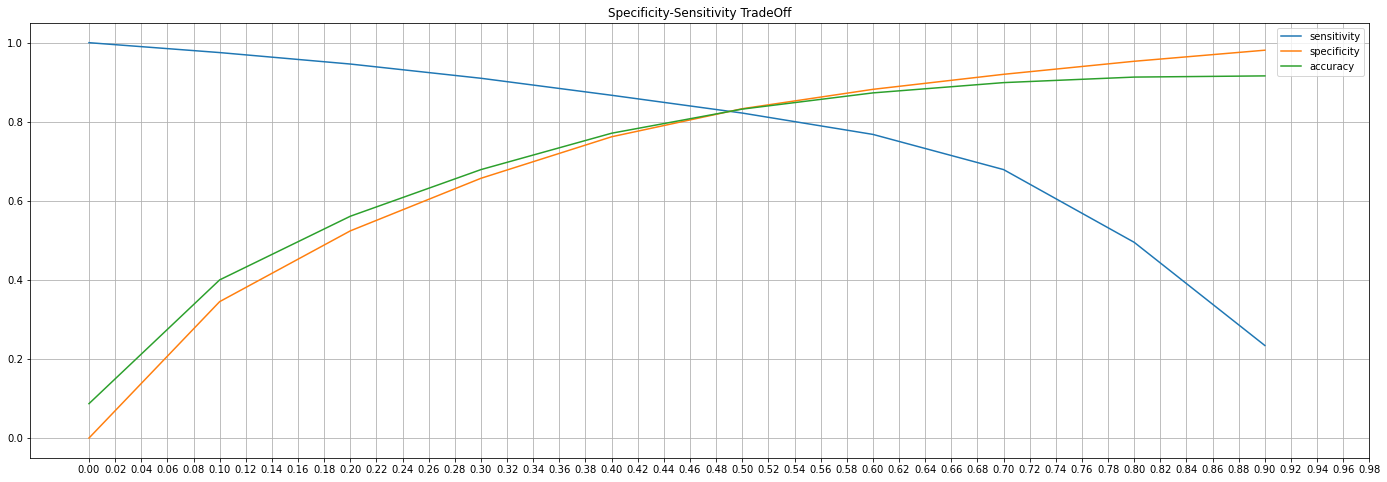

In [127]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

# Baseline Performance at Optimum Cutoff

In [128]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15878  3309]
 [  318  1502]]

Confusion Matrix for test: 
 [[6832 1399]
 [ 143  630]]


In [129]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.829
Sensitivity / True Positive Rate / Recall : 0.815
Specificity / True Negative Rate :  0.83
Precision / Positive Predictive Value : 0.31
F1-score : 0.449


In [130]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.875


# Feature Selection using RFE

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, 15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [133]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
61,std_ic_t2t_mou_7,1,True
220,sachet_2g_7_0,1,True
105,sachet_3g_8_0,1,True
83,total_rech_num_8,1,True
81,total_rech_num_6,1,True
68,std_ic_t2f_mou_8,1,True
67,std_ic_t2f_mou_7,1,True
62,std_ic_t2t_mou_8,1,True
56,loc_ic_t2f_mou_8,1,True
255,sachet_2g_6_0,1,True


In [134]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['std_ic_t2t_mou_7',
 'sachet_2g_7_0',
 'sachet_3g_8_0',
 'total_rech_num_8',
 'total_rech_num_6',
 'std_ic_t2f_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'sachet_2g_6_0',
 'isd_og_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_7',
 'loc_og_t2f_mou_7',
 'sachet_2g_8_0']

# Logistic Regression with RFE Selected Columns
Model I

In [135]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

NameError: name 'y_train_resampled' is not defined

# Logistic Regression with Manual Feature Elimination

In [ ]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

'monthly_2g_7_0' has the very p-value. Hence, this feature could be eliminated

In [ ]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_2g_7_0')
selected_columns

# Model II

In [ ]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

'monthly_2g_6_0' has very high p-value. Hence, this feature could be eliminated

In [ ]:
selected_columns.remove('monthly_2g_6_0')
selected_columns

# Model III

In [ ]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

All features have low p-values(<0.05) and VIF (<5)
This model could be used as the interpretable logistic regression model.

# Final Logistic Regression Model with RFE and Manual Elimination

In [136]:
logr3_fit.summary()

NameError: name 'logr3_fit' is not defined

In [137]:
selected_columns

NameError: name 'selected_columns' is not defined

In [138]:
# Prediction 
y_train_pred_lr = logr3_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

NameError: name 'logr3_fit' is not defined

In [139]:
y_test_pred_lr = logr3_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

NameError: name 'logr3_fit' is not defined

# Performance
Finding Optimum Probability Cutoff

In [140]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

NameError: name 'X_train_resampled' is not defined

In [141]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

NameError: name 'y_train_resampled' is not defined

In [142]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');


TypeError: no numeric data to plot

The optimum probability cutoff for Logistic regression model is 0.53

In [143]:
optimum_cutoff = 0.53
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

NameError: name 'y_train_pred_lr' is not defined

In [144]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.829
Sensitivity / True Positive Rate / Recall : 0.815
Specificity / True Negative Rate :  0.83
Precision / Positive Predictive Value : 0.31
F1-score : 0.449


In [145]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

NameError: name 'y_train_resampled' is not defined

# Model 1 : Logistic Regression (Interpretable Model Summary)

In [146]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

NameError: name 'logr3_fit' is not defined

The above model could be used as the interpretable model for predicting telecom churn.

# PCA

In [147]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.64887430e-01,  1.93987506e-01,  1.67239206e-01, ...,
         0.00000000e+00, -1.71379776e-08,  0.00000000e+00],
       [ 6.48591957e-02,  9.55966678e-02,  1.20775173e-01, ...,
        -0.00000000e+00, -5.22996117e-08, -0.00000000e+00],
       [ 2.38415388e-01,  2.73645506e-01,  2.38436262e-01, ...,
         0.00000000e+00,  8.87867689e-09,  0.00000000e+00],
       ...,
       [-0.00000000e+00, -7.12518766e-35,  9.94774806e-35, ...,
         1.00000000e+00, -1.17539042e-16, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-0.00000000e+00, -3.05942429e-16,  2.55182656e-16, ...,
        -0.00000000e+00,  1.21407979e-03, -0.00000000e+00]])

In [148]:
pca.explained_variance_ratio_

array([2.72067606e-01, 1.62438237e-01, 1.20827532e-01, 1.06070061e-01,
       9.11349415e-02, 4.77504426e-02, 2.63978649e-02, 2.56843975e-02,
       1.91789379e-02, 1.68045934e-02, 1.55523471e-02, 1.31676632e-02,
       1.04552135e-02, 7.72970432e-03, 7.22746857e-03, 6.14494828e-03,
       5.62073085e-03, 5.44579278e-03, 4.59009979e-03, 4.38488171e-03,
       3.46703620e-03, 3.27941485e-03, 2.78099334e-03, 2.13444267e-03,
       2.07542042e-03, 1.89794717e-03, 1.41383940e-03, 1.30240760e-03,
       1.15369571e-03, 1.05262498e-03, 9.64293402e-04, 9.16685958e-04,
       8.84067024e-04, 7.62966075e-04, 6.61794750e-04, 5.69667247e-04,
       5.12585469e-04, 5.04441275e-04, 4.82396689e-04, 4.46889504e-04,
       4.36441323e-04, 4.10389486e-04, 3.51844812e-04, 3.12626204e-04,
       2.51673020e-04, 2.34723889e-04, 1.96950081e-04, 1.71296754e-04,
       1.59882686e-04, 1.48330397e-04, 1.45919480e-04, 1.08583738e-04,
       1.04038514e-04, 8.90621828e-05, 8.53009228e-05, 7.60704115e-05,
      

# Scree Plot

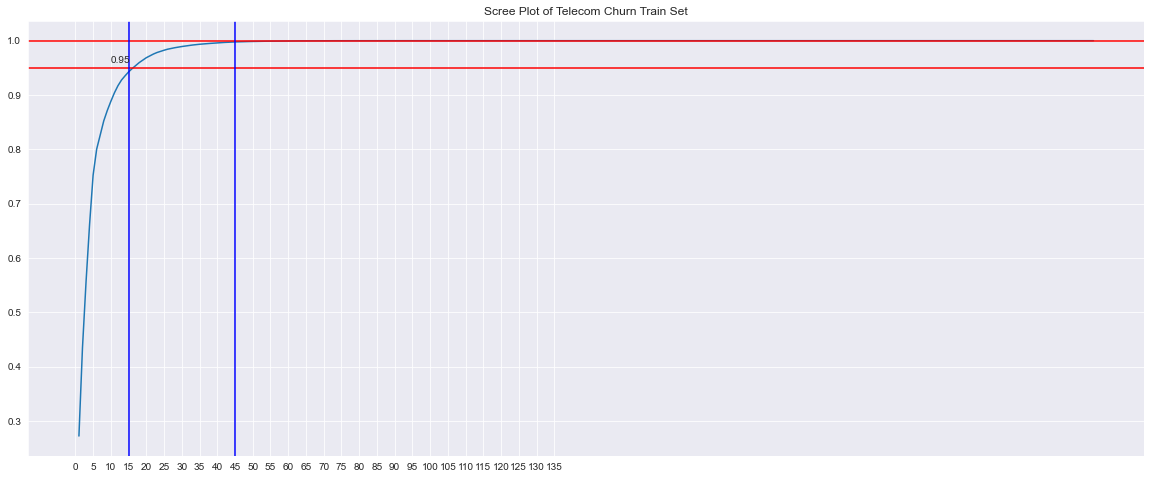

In [149]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(np.arange(1,len(var_cum) + 1), var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.

In [150]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000166926,-907.57,-342.92,13.09,58.81,-95.62,-1050.54,254.65,-31.45,305.14,-216.81,95.82,231.41,-111.00,-2.01,444.98,31.54,573.83,-278.54,30.77,-36.92,-0.29,-83.57,-13.96,-60.93,-53.21,56.05,-17.78,-12.62,14.15,-30.56,26.07,-1.08,-19.82,-3.30,-2.72,7.47,22.70,28.71,-14.30,4.96,-8.69,2.46,17.15,-21.83,-8.18,0
7001343085,573.90,-902.39,-424.84,-331.15,-148.99,-36.96,-134.45,265.33,-92.07,-164.20,25.11,-36.98,164.79,-222.91,-12.57,-50.57,-44.77,-62.98,-18.10,-86.24,-115.40,-45.78,16.35,-21.50,-10.54,-71.75,29.23,-20.88,-0.69,3.22,-21.22,65.50,-39.72,50.43,10.59,43.05,0.20,-66.12,13.57,25.81,52.08,-3.27,8.41,19.39,-38.76,0
7001863283,-1538.20,514.03,846.87,57.03,-1126.23,-84.21,-44.42,-88.16,-58.41,50.52,3.05,-229.10,-109.22,-3.25,7.05,-85.65,54.54,-52.29,20.98,-90.81,96.35,24.28,-52.43,42.43,-40.63,-12.72,-4.33,-4.09,50.34,-0.78,-35.15,-121.58,98.87,-34.07,-8.93,22.92,1.65,52.63,-8.56,9.07,-18.35,3.69,25.99,27.24,19.70,0
7002275981,486.83,-224.93,1130.46,-496.19,6.01,81.11,-148.67,170.28,-7.37,-99.56,-159.66,-14.19,-98.68,213.23,-34.92,-17.21,29.64,4.94,2.80,-49.58,-88.57,16.81,-9.47,4.38,29.53,38.21,32.47,-5.32,-60.15,12.59,20.99,80.71,-50.98,-3.71,65.00,-57.84,-8.32,-5.93,-5.06,-5.68,-12.09,-14.69,-32.25,12.50,-20.17,0
7001086221,-1420.95,794.07,99.22,155.12,145.35,784.72,-10.95,609.72,-172.48,-42.80,59.17,-162.91,-112.22,-55.11,17.30,-152.11,-611.93,181.58,-211.36,-77.18,116.28,83.49,-26.26,128.49,-69.09,4.85,-128.28,44.33,-6.47,-28.78,14.62,-31.36,27.33,-25.95,8.94,-34.84,-21.92,17.96,-0.85,-19.40,-5.37,6.30,-11.31,41.98,-8.38,0


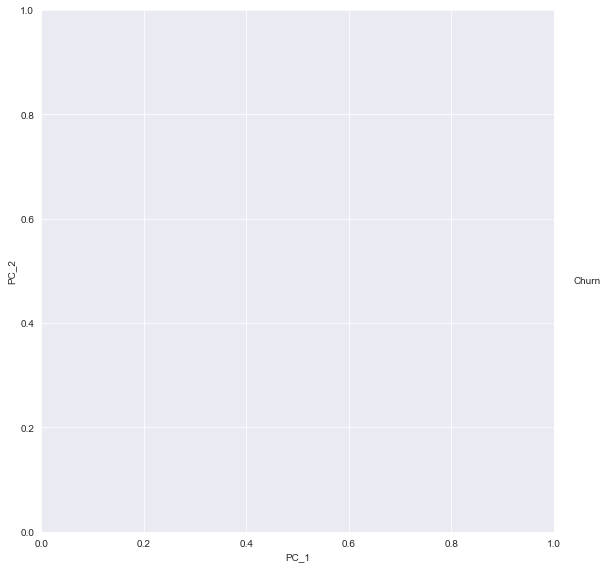

In [151]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);

# Model 2 : PCA + Logistic Regression Model

In [152]:
# X,y Split
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [153]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [154]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 1, 1, 1, 0], dtype=int64)

# Baseline Performance

In [155]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.624
Sensitivity / True Positive Rate / Recall : 0.914
Specificity / True Negative Rate :  0.597
Precision / Positive Predictive Value : 0.177
F1-score : 0.297

Test Performance :

Accuracy : 0.625
Sensitivity / True Positive Rate / Recall : 0.902
Specificity / True Negative Rate :  0.599
Precision / Positive Predictive Value : 0.174
F1-score : 0.292


# Hyperparameter Tuning

In [156]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [157]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   23.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [158]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8758227173678919
Best Parameters : {'C': 5, 'penalty': 'l2'}


In [159]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [160]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [161]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.628
Sensitivity / True Positive Rate / Recall : 0.917
Specificity / True Negative Rate :  0.6
Precision / Positive Predictive Value : 0.179
F1-score : 0.3

Test Performance :

Accuracy : 0.627
Sensitivity / True Positive Rate / Recall : 0.904
Specificity / True Negative Rate :  0.601
Precision / Positive Predictive Value : 0.176
F1-score : 0.295


# Model 3 : PCA + Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                     1: 0.9135983472726666},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [163]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                                            1: 0.9135983472726666},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [164]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8862397191895703
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 20, 'n_estimators': 100}


In [165]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [166]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 1, 0, 0, 0], dtype=int64)

In [167]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.882
Sensitivity / True Positive Rate / Recall : 0.818
Specificity / True Negative Rate :  0.888
Precision / Positive Predictive Value : 0.409
F1-score : 0.545

Test Performance :

Accuracy : 0.869
Sensitivity / True Positive Rate / Recall : 0.726
Specificity / True Negative Rate :  0.882
Precision / Positive Predictive Value : 0.366
F1-score : 0.487


In [168]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.8668063026610178

# Model 4 : PCA + XGBoost

In [169]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

In [ ]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

In [ ]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

In [ ]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

In [170]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

NameError: name 'pca_xgb_search' is not defined

In [ ]:
X_train_pca.head()

In [ ]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

In [ ]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

In [ ]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

# Recommendations

In [171]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most Important Predictors of churn , in the order of importance are : 


NameError: name 'lr_results' is not defined

From the above, the following are the strongest indicators of churn

Customers who churn show lower average monthly local incoming calls from fixed line in the action period by 1.27 standard deviations , compared to users who don't churn , when all other factors are held constant. This is the strongest indicator of churn.
Customers who churn show lower number of recharges done in action period by 1.20 standard deviations, when all other factors are held constant. This is the second strongest indicator of churn.
Further customers who churn have done 0.6 standard deviations higher recharge than non-churn customers. This factor when coupled with above factors is a good indicator of churn.
Customers who churn are more likely to be users of 'monthly 2g package-0 / monthly 3g package-0' in action period (approximately 0.3 std deviations higher than other packages), when all other factors are held constant.

Based on the above indicators the recommendations to the telecom company are :

Concentrate on users with 1.27 std devations lower than average incoming calls from fixed line. They are most likely to churn.
Concentrate on users who recharge less number of times ( less than 1.2 std deviations compared to avg) in the 8th month. They are second most likely to churn.
Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has an ROC score of 0.87, test sensitivity of 100%